## 🎥 Exploring Movies with Data! 📊

**Getting Started:** I began by importing some essential Python libraries like Pandas, NumPy, Matplotlib, and Seaborn. These are the tools I use to work with data and visualize my findings.

**Loading Data:** Using Pandas, I loaded movie data from CSV files – one containing information about the movies themselves and another with details about movie credits. Before diving in, I checked the dimensions of the datasets to ensure everything was loaded correctly.

**Preprocessing:** I cleaned up the data a bit, renaming columns for consistency and merging the movie and credits dataframes into one. This combined dataset (df) gives me a comprehensive view of each movie's details.

**Analysis:** Here's where the fun begins! I selected specific columns like the movie title, vote count, and vote average for analysis. Using this data, I calculated a weighted rating for each movie, considering both the number of votes and the average rating. Then, I sorted the movies based on their weighted ratings to find the top performers.

**Popularity Threshold:** To identify popular movies, I set a popularity threshold based on the 95th percentile of the weighted ratings. Movies exceeding this threshold are considered popular, and I sorted them based on their vote count to find the top 10 most popular ones.

**Genre Exploration:** Movies come in all genres, so I wanted to dive deeper into genre trends. Using a neat little function, I extracted genre names from the dataset and explored the top 10 movies in genres like Action, Romance, and Comedy.

**Content-Based Recommendations:** Ever wonder how streaming platforms recommend movies? Well, I implemented a similar system! By analyzing movie overviews using TF-IDF vectorization and cosine similarity, I can recommend movies based on their plot descriptions. It's like having your own personal movie curator!

**Sharing Insights:** Finally, I wanted to visualize my findings and share them with others. I created bar plots to showcase the top movies based on weighted ratings and popularity, making it easy to see which movies are worth checking out.

**Importing Libraries:**

I start by importing necessary libraries such as Pandas, NumPy, Matplotlib, Seaborn, and scikit-learn for data manipulation, visualization, and machine learning tasks.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

**Loading Data:**

Next, I load the movie data and credits data from CSV files using Pandas' read_csv() function. I print the shapes of the dataframes to check the dimensions.

In [2]:
# Load movie data and credits data
movie_df = pd.read_csv("Resources/tmdb_5000_movies.csv")
credits_df = pd.read_csv("Resources/tmdb_5000_credits.csv")

In [3]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
print('shape credits_df ',credits_df.shape)
print('shape movie_df ',movie_df.shape)

shape credits_df  (4803, 4)
shape movie_df  (4803, 20)


**Data Preprocessing:**

To ensure consistency, I rename the 'movie_id' column in the credits data to 'id'. Additionally, I drop the 'title' column from the credits data as it's not needed for the analysis. Then, I merge the credits and movie dataframes on the 'id' column to create a single dataframe (df) containing information about movies and credits.

In [5]:
# Rename the 'movie_id' column to 'id'
credits_df = credits_df.rename(columns={'movie_id': 'id'})

# Drop the 'title' column from the credits data
credits_df = credits_df.drop('title', axis=1)

# Merge the credits and movie data on the 'id' column
df = credits_df.merge(movie_df, on='id')

In [6]:
df.head()

,id,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâ€™s past sends him...,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
df.columns

Index(['id', 'cast', 'crew', 'budget', 'genres', 'homepage', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

**Analysis:**

For analysis, I select specific columns ('title', 'vote_count', 'vote_average'). Then, I calculate the weighted rating for each movie using a formula that considers both vote count and vote average. After sorting the dataframe based on weighted ratings in descending order, I display and visualize the top 10 movies based on weighted ratings using a bar plot.

In [8]:
# Select specific columns for analysis
df[['title','vote_count','vote_average']]

,title,vote_count,vote_average
0,Avatar,11800,7.2
1,Pirates of the Caribbean: At World's End,4500,6.9
2,Spectre,4466,6.3
3,The Dark Knight Rises,9106,7.6
4,John Carter,2124,6.1
...,...,...,...
4798,El Mariachi,238,6.6
4799,Newlyweds,5,5.9
4800,"Signed, Sealed, Delivered",6,7.0
4801,Shanghai Calling,7,5.7


In [9]:
# Extract the 'vote_count' and 'vote_average' columns
v = df['vote_count']
R = df['vote_average']

# Calculate the quantile for 'vote_count'
m = v.quantile(0.70)

# Calculate the mean of 'vote_average'
c = R.mean()

# Calculate the weighted rating 'w_rating' for each movie
df['w_rating'] = (R * v + m * c)/(v + m)

In [10]:
# Sort the DataFrame by 'w_rating' in descending order
df_sorted = df.sort_values('w_rating', ascending=False)

# Display the top 10 movies based on weighted ratings
df_sorted.head()

,id,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,w_rating
1881,278,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,...,9/23/1994,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,8.340775
3337,238,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,3/14/1972,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893,8.192887
662,550,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,...,10/15/1999,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,8.171648
3232,680,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",...,10/8/1994,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,8.157615
65,155,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,7/16/2008,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,8.102674


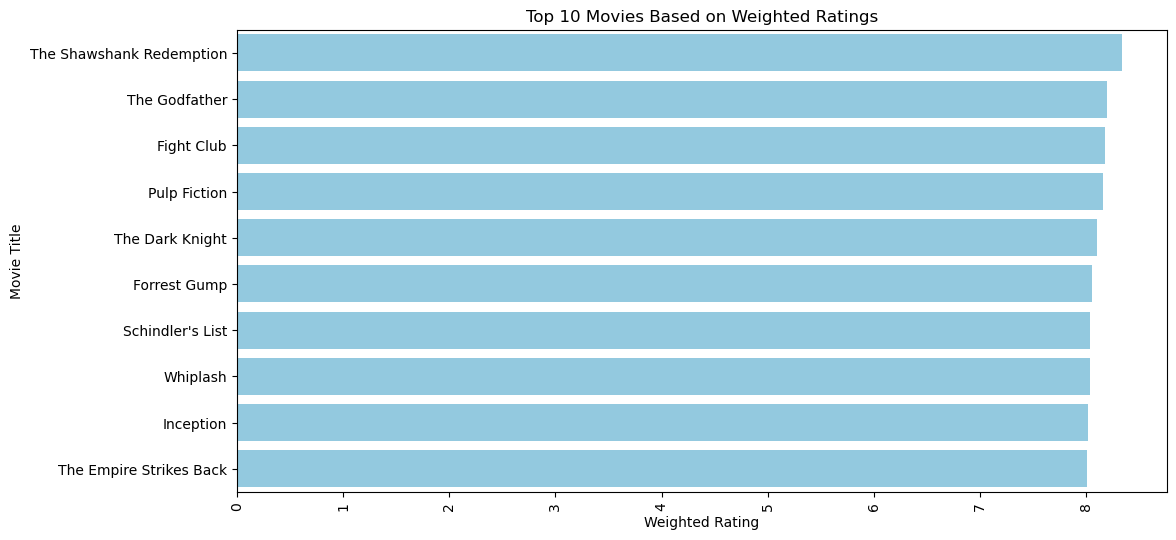

In [11]:
# Create a bar plot to visualize the top movies based on weighted ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='w_rating', y='title', data=df_sorted.head(10), color='skyblue')
plt.xlabel('Weighted Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies Based on Weighted Ratings')
plt.xticks(rotation=90)
plt.show()

**Popularity Threshold:**

I define a popularity threshold based on the 95th percentile of 'w_rating'. Popular movies that exceed this threshold are selected and sorted based on vote count. I display and visualize the top 10 popular movies using a bar plot.

In [12]:
# Define a popularity threshold based on the 95th percentile of 'w_rating'
popularity_threshold = df['w_rating'].quantile(0.95)

# Select popular movies that exceed the popularity threshold
popular_movies = df[df['w_rating'] > popularity_threshold]

# Select popular movies that exceed the popularity threshold
top_popular_movies = popular_movies.sort_values(by=['vote_count'], ascending=False)

# Select popular movies that exceed the popularity threshold
top_10_movies = top_popular_movies.head(10)

In [13]:
top_10_movies

,id,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,w_rating
96,27205,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",...,7/14/2010,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,8.018611
65,155,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,7/16/2008,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,8.102674
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.148013
16,24428,"[{""cast_id"": 46, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de...",220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,...,4/25/2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,7.338509
788,293660,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,...,2/9/2016,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,7.334360
95,157336,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,...,11/5/2014,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,7.998100
287,68718,"[{""cast_id"": 6, ""character"": ""Django"", ""credit...","[{""credit_id"": ""5703f6a2c3a36869850001d9"", ""de...",100000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 37, ""name...",http://unchainedmovie.com/,"[{""id"": 801, ""name"": ""bounty hunter""}, {""id"": ...",en,Django Unchained,"With the help of a German bounty hunter, a fre...",...,12/25/2012,425368238,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"Life, liberty and the pursuit of vengeance.",Django Unchained,7.8,10099,7.707093
94,118340,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"":

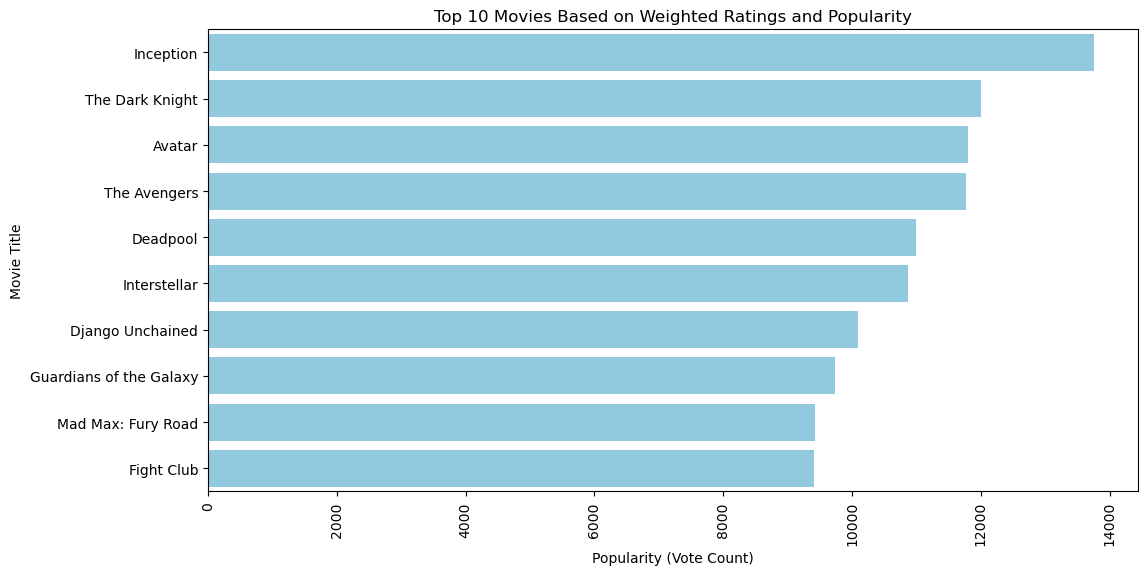

In [14]:
# Create a bar plot to visualize the top popular movies
plt.figure(figsize=(12, 6))
sns.barplot(x='vote_count', y='title', data=top_10_movies, color='skyblue')
plt.xlabel('Popularity (Vote Count)')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies Based on Weighted Ratings and Popularity')
plt.xticks(rotation=90)
plt.show()

**Genre Extraction:**

To extract genre names from JSON-like genre data, I define a function (extract_genre_names). Then, I apply this function to the 'genres' column in the dataframe to extract genre names.

In [15]:
# Define a function to extract genre names from JSON-like genre data
def extract_genre_names(data):
    # Parse the genre data using JSON.loads, replacing single quotes with double quotes if needed
    genre_data = json.loads(data.replace("'", "\""))
    
    # Initialize an empty list to store genre names
    genre_names = []
    
    # Iterate through the genre data and extract genre names if they exist
    for genre in genre_data:
        if "name" in genre:
            genre_names.append(genre["name"])
    
    # Return the list of extracted genre names
    return genre_names

# Apply the 'extract_genre_names' function to the 'genres' column
df_sorted["genres"] = df_sorted["genres"].apply(extract_genre_names)

# Display the DataFrame with extracted genre names
df_sorted

,id,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,w_rating
1881,278,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",25000000,"[Drama, Crime]",NaN,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,...,9/23/1994,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,8.340775
3337,238,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",6000000,"[Drama, Crime]",http://www.thegodfather.com/,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,3/14/1972,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893,8.192887
662,550,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",63000000,[Drama],http://www.foxmovies.com/movies/fight-club,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,...,10/15/1999,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,8.171648
3232,680,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8000000,"[Thriller, Crime]",NaN,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",...,10/8/1994,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,8.157615
65,155,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",185000000,"[Drama, Action, Crime, Thriller]",http://thedarkknight.warnerbros.com/dvdsite/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,7/16/2008,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,8.102674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,314,"[{""cast_id"": 2, ""character"": ""Patience Phillip...","[{""credit_id"": ""52fe4236c3a36847f800caa1"", ""de...",100000000,"[Action, Crime]",NaN,"[{""id"": 418, ""name"": ""white russian""}, {""id"": ...",en,Catwoman,Liquidated after discovering a corporate consp...,...,7/22/2004,82102379,104.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,CATch her in IMAX,Catwoman,4.2,808,4.991470
3746,241251,"[{""cast_id"": 3, ""character"": ""Claire Peterson""...","[{""credit_id"": ""55423058c3a3681da0003d57"", ""de...",4000000,[Thriller],http://www.theboynextdoorfilm.com/,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...",en,The Boy Next Door,A recently cheated on married woman falls for ...,...,1/23/2015,52425855,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A Moment She Couldn't Resist. An Obsession He ...,The Boy Next Door,4.1,1022,4.822053
210,415,"[{""cast_id"": 4, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""59b66a169251417cbc011ec4"", ""de...",125000000,"[Action, Crime, Fantasy]",NaN,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman & Robin,Along with crime-fighting partner Robin and ne...,...,6/20/1997,238207122,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Strength. Courage. Honor. And loyalty.,Batman & Robin,4.2,1418,4.749951
242,166424

In [16]:
df_sorted["genres"]

1881                                       [Drama, Crime]
3337                                       [Drama, Crime]
662                                               [Drama]
3232                                    [Thriller, Crime]
65                       [Drama, Action, Crime, Thriller]
                              ...                        
303                                       [Action, Crime]
3746                                           [Thriller]
210                              [Action, Crime, Fantasy]
242                  [Action, Adventure, Science Fiction]
1652    [Action, Adventure, Fantasy, Science Fiction, ...
Name: genres, Length: 4803, dtype: object

**Genre-Based Recommendations:**

I define a function (top_10_by_genre) to recommend the top 10 movies of specified genres based on weighted ratings. This function is called with the specified genres ('Action', 'Romance', 'Comedy'), and the results are converted into a dataframe.

In [17]:
# Define a function to recommend the top 10 movies of specified genre(s) based on 'w_rating'
def top_10_by_genre(genres):
    # Convert input genres to a list if it's a string with genres separated by a comma
    if isinstance(genres, str):
        genres = genres.split(', ')
    
    # Filter the DataFrame to select movies that have all of the specified genres
    data = df_sorted[df_sorted['genres'].apply(lambda x: all(genre in x for genre in genres))]
    
    # Return the top 10 movies that match all the specified genres, including their titles, genres, and weighted ratings
    return data[['title', 'genres', 'w_rating']].head(10)


In [18]:
genre = 'Action, Romance, Comedy'
top_10_genre_movies = top_10_by_genre(genre)

# Convert the result into a DataFrame
top_10_genre_movies_df = pd.DataFrame(top_10_genre_movies)

top_10_genre_movies_df

,title,genres,w_rating
2565,Grosse Pointe Blank,"[Action, Comedy, Thriller, Romance]",6.351696
2564,Love & Basketball,"[Action, Comedy, Drama, Romance]",6.264203
3816,Annie Get Your Gun,"[Action, Comedy, Music, Romance, Western]",6.136238
534,Bandits,"[Action, Comedy, Crime, Romance]",6.129051
2681,Jonah: A VeggieTales Movie,"[Action, Adventure, Animation, Comedy, Family,...",6.103402
4487,Hav Plenty,"[Action, Comedy, Romance, Science Fiction, Thr...",6.092172
3756,3 Strikes,"[Action, Comedy, Romance]",6.087335
1973,Double Take,"[Adventure, Drama, Action, Comedy, Romance]",6.068680
3086,Gun Shy,"[Action, Comedy, Romance, Thriller]",6.064714
1515,Laws of Attraction,"[Action, Comedy, Romance, Thriller]",6.017448


**TF-IDF Vectorization and Cosine Similarity:**

I preprocess the 'overview' column in the movie dataframe by filling missing values with an empty string. Then, I perform TF-IDF vectorization on movie overviews to convert text data into numerical vectors. After that, I calculate cosine similarity between movie overviews to measure their similarity.

In [19]:
# Fill missing values in the 'overview' column with an empty string
movie_df['overview'].fillna('', inplace=True)

# TF-IDF Vectorization of movie overviews
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movie_df['overview'])

In [20]:
# Calculate cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

**Movie Recommendations:**

I define a function (get_recommendations) to get movie recommendations based on plot descriptions. This function is called to recommend movies similar to "American Heist", and the results are converted into a dataframe.

In [21]:
# Function to get movie recommendations based on plot description
def get_recommendations(movie_title, cosine_sim=cosine_sim):
    
    # Find the index of the input movie title in the DataFrame
    movie_index = movie_df.index[movie_df['title'] == movie_title].tolist()[0]
    
    # Calculate the similarity scores between the input movie and all other movies
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    
    # Sort the movies by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar movies (excluding the input movie itself)
    sim_scores = sim_scores[0:10]  # Get top 10 similar movies (excluding the input movie)
    
    # Extract the indices of the top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the titles of the top 10 recommended movies
    return movie_df['title'].iloc[movie_indices]

In [22]:
# Example usage: Get movie recommendations for "The Godfather"
recommended_movies = get_recommendations("American Heist")

recommended_movies_df = pd.DataFrame({'Recommended Movies': recommended_movies})

recommended_movies_df

,Recommended Movies
3142,American Heist
3032,The Long Riders
2279,Bad Teacher
1612,Larry Crowne
2349,Small Time Crooks
1765,The Newton Boys
918,Inside Man
534,Bandits
4622,The Looking Glass
2801,The Funeral
